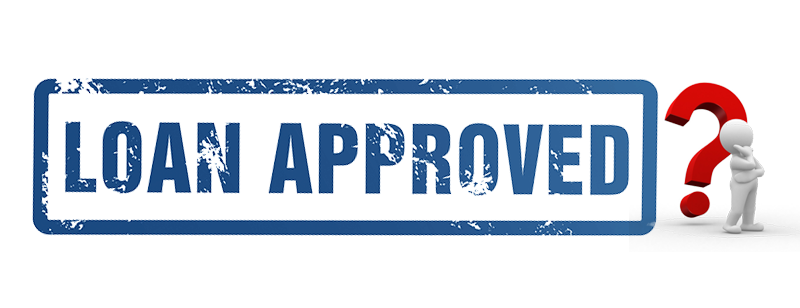

## Developed By - Sumit Rathi



**Domain** - Banking

**Dataset** - Loan Payment data (Loan_payments_data.csv)

**Objective** - Classify customers into following three Loan_status categories so that banks can identify to which customers they will provide loan.

PAIDOFF - loan paid off by the customers on or before due date

COLLECTION - bank starts to collect money from those customers who seem to be unwilling to repay the loan amount (May be defaulters)

COLLECTION_PAIDOFF - loan amount was repaid by the customers after conducting collection drive. 

**Attributes in dataset**

Loan_id : A unique loan number assigned to each loan customers

Loan_status: Whether a loan is paid off, in collection, or paid off after the collection efforts

Principal: Basic principal loan amount at the origination terms, could be weekly (7 days), biweekly, and monthly payoff schedule

effective_date: When the loan got originated and took effects

due_date: Since it’s one-time payoff schedule, each loan has one single due date

paidoff_time: The actual time a customer pays off the loan

pastdue_days: How many days a loan has been past due

age, education, Gender: A customer’s basic demographic information



## Uploading and understanding of loan payment dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Upload loan payment dataset
df = pd.read_csv('D:/PythonLearn/Loan_payments_data.csv')

In [4]:
# Print dataset information
df.head()
df.tail()
df.info()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female
499,xqd20160500,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/19/2016 11:58,8.0,28,High School or Below,male


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null object
due_date          500 non-null object
paid_off_time     400 non-null object
past_due_days     200 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 43.0+ KB


## Data wrangling and feature engineering

In [5]:
# Replace 0 in place of NaN in 'past_due_days' column because loan has been paid off before or on due date
df['past_due_days'] = df['past_due_days'].fillna(value=0)
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,0.0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,0.0,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,0.0,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,0.0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,0.0,28,college,female


In [6]:
# Drop loan_id, effective_date, due_date, paid_off_time and education columns from dataset as there is no relevance of these columns
df.drop(['Loan_ID','effective_date','due_date','paid_off_time','education'], axis=1, inplace=True)

In [7]:
# dummy coding for changing the columns from categorical to numerical
for col in df.columns:
    if df[col].dtype =='object':
        df[col]=pd.Categorical(df[col]).codes

In [8]:
# Print information of data set after feature engineering and print the descriptive statistics
df.head()
df.tail()
df.info()
df.describe()

,loan_status,Principal,terms,past_due_days,age,Gender
0,2,1000,30,0.0,45,1
1,2,1000,30,0.0,50,0
2,2,1000,30,0.0,33,0
3,2,1000,15,0.0,27,1
4,2,1000,30,0.0,28,0


,loan_status,Principal,terms,past_due_days,age,Gender
495,1,1000,30,3.0,28,1
496,1,1000,15,14.0,26,1
497,1,800,15,3.0,30,1
498,1,1000,30,1.0,38,0
499,1,1000,30,8.0,28,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
loan_status      500 non-null int8
Principal        500 non-null int64
terms            500 non-null int64
past_due_days    500 non-null float64
age              500 non-null int64
Gender           500 non-null int8
dtypes: float64(1), int64(3), int8(2)
memory usage: 16.7 KB


,loan_status,Principal,terms,past_due_days,age,Gender
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,1.400000,943.200000,22.824000,14.404000,31.116000,0.84600
std,0.800801,115.240274,8.000064,25.614312,6.084784,0.36131
min,0.000000,300.000000,7.000000,0.000000,18.000000,0.00000
25%,1.000000,1000.000000,15.000000,0.000000,27.000000,1.00000
50%,2.000000,1000.000000,30.000000,0.000000,30.000000,1.00000
75%,2.000000,1000.000000,30.000000,12.000000,35.000000,1.00000
max,2.000000,1000.000000,30.000000,76.000000,51.000000,1.00000


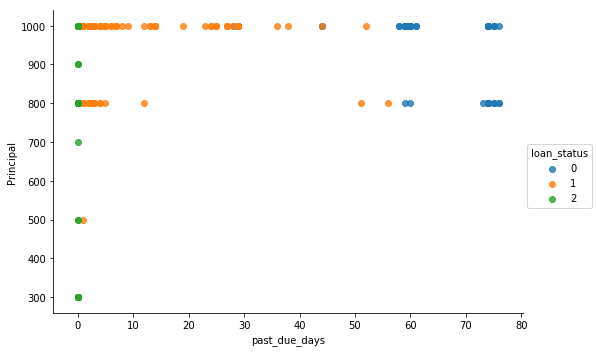

In [9]:
# Plot scatterplot to find relationship between principal and past_due_days
sns.lmplot(x='past_due_days', y='Principal', hue = 'loan_status', data=df, aspect=1.5, ci = None, fit_reg = False)
plt.show()

Above chart shows if due days past to 58 days then there are 100% chances the customer will be defaulter 

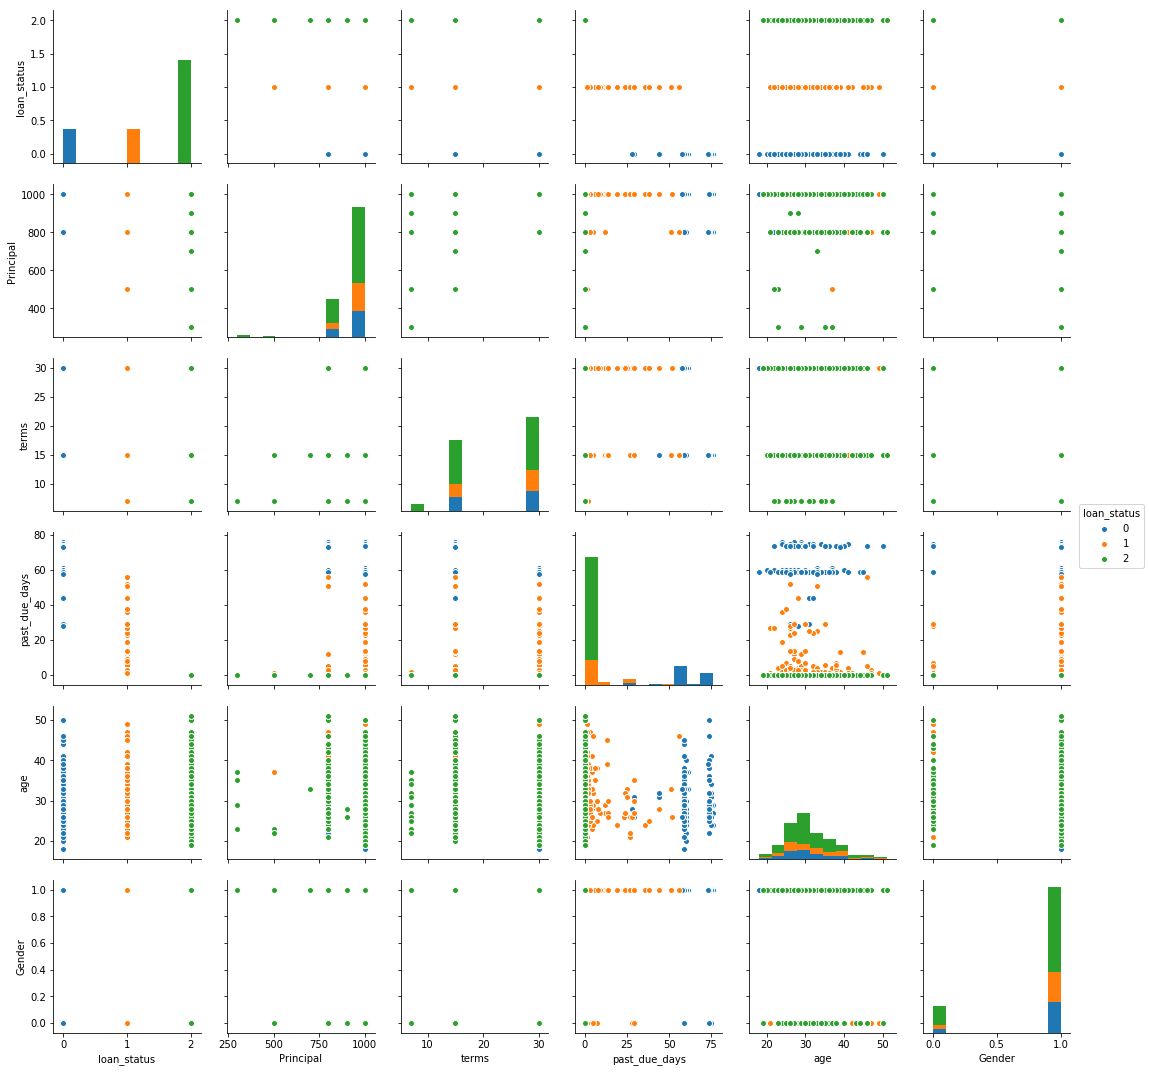

In [10]:
# Plot pair plot to find relationship pairwise
sns.pairplot(df, hue="loan_status")
plt.show()

## Deploying ML model - Logistic Regression

In [11]:
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
from sklearn.linear_model import LogisticRegression 

D:\PythonLearn\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
# Define features
x=df.drop('loan_status',axis=1)

In [13]:
# Define label
y=df['loan_status']

In [14]:
# Create train and test data 75% and 25% split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape
type(train_x)

(375, 5)

(125, 5)

(375,)

(125,)

pandas.core.frame.DataFrame

In [15]:
# Create instant for logistic regression to classify customers
log = LogisticRegression()

In [16]:
# Fit model on train data
log.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
# Print coefficient of each variable passing in model
log.coef_

array([[-9.24159446e-03,  2.35840749e-01,  1.99899328e-01,
        -1.65893679e-01,  1.21832595e-03],
       [-9.96276642e-04,  2.15348981e-02, -1.15151054e-02,
         7.05598030e-03,  1.97623252e-02],
       [ 5.44486254e-03, -6.63019259e-02, -4.40107914e+00,
        -1.15705026e-02,  4.95536355e-01]])

In [19]:
# Concatenating the coefficient with the variables
coeff = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(log.coef_))], axis = 1)
coeff.columns = ("Variable", "Collection (0)", "Collection_Paidoff (1)", "Paidoff (2)")
coeff

,Variable,Collection (0),Collection_Paidoff (1),Paidoff (2)
0,Principal,-0.009242,-0.000996,0.005445
1,terms,0.235841,0.021535,-0.066302
2,past_due_days,0.199899,-0.011515,-4.401079
3,age,-0.165894,0.007056,-0.011571
4,Gender,0.001218,0.019762,0.495536


In [20]:
# Applying learnt model on test data and print the output
y_log_pred_test = log.predict(test_x)
y_log_pred_test

array([0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 1, 2, 2,
       1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       1, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       0, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2,
       0, 0, 1, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2], dtype=int8)

In [21]:
# Check the accuracy score of model
metrics.accuracy_score(test_y, y_log_pred_test)

0.912

In [22]:
# creating a confusion matrix to understand the classification
conf = metrics.confusion_matrix(test_y, y_log_pred_test)
conf

array([[28,  2,  0],
       [ 3, 21,  6],
       [ 0,  0, 65]], dtype=int64)

Text(0.5,15,'Predicted')

Text(33,0.5,'Actual')

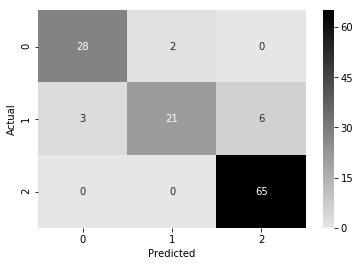

In [23]:
# Plot confusion matrix
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['0','1','2'],yticklabels=['0','1','2'],annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [24]:
# Calculate precision and recall in logistic regression
print (metrics.classification_report(test_y, y_log_pred_test))

             precision    recall  f1-score   support

          0       0.90      0.93      0.92        30
          1       0.91      0.70      0.79        30
          2       0.92      1.00      0.96        65

avg / total       0.91      0.91      0.91       125



## Deploying ML model - Decision Tree

In [25]:
from sklearn import tree

In [26]:
# Create instant for decision tree to classify customers
my_tree_one = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [27]:
# Fit model on train data
my_tree_one = my_tree_one.fit(train_x, train_y)

In [28]:
# Applying learnt model on test data and print the output
pred = my_tree_one.predict(test_x)
pred

array([0, 0, 2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0,
       0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 1, 1, 2,
       1, 0, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0,
       1, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2,
       0, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2], dtype=int8)

In [29]:
# Check the accuracy score of model
metrics.accuracy_score(test_y, pred)

0.976

In [30]:
# creating a confusion matrix to understand the classification
conf = metrics.confusion_matrix(test_y, pred)
conf

array([[27,  3,  0],
       [ 0, 30,  0],
       [ 0,  0, 65]], dtype=int64)

Text(0.5,15,'Predicted')

Text(33,0.5,'Actual')

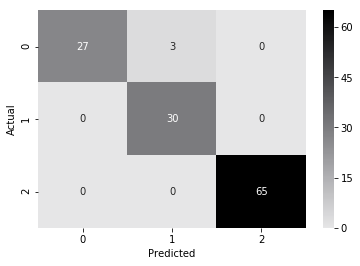

In [33]:
# Plot confusion matrix
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['0','1','2'],yticklabels=['0','1','2'],annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
# Calculate precision and recall in decision tree
print (metrics.classification_report(test_y, pred))

             precision    recall  f1-score   support

          0       1.00      0.90      0.95        30
          1       0.91      1.00      0.95        30
          2       1.00      1.00      1.00        65

avg / total       0.98      0.98      0.98       125



## Conclude the best model after comparing Logistic Regression and Decision Tree models

If we comparison the metrics of two models, following points can be considered,
1. If we look at the avg of recall then Decision Tree will be better model as avg recall is high in comparision of Logistic Regression.
2. If we look at the recall value of 0 (in collection) then Logistic Regression will be better as recall value is high in comparision of Decision Tree.
3. However, as per my view, focus should be more on to identify the customers who are not willing to repay the loan. So Logistic Regression is the best model because the recall of 0 is high. 